In [9]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.style as style

In [5]:
data = pd.read_csv('dynamic_pricing.csv')
data

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422
...,...,...,...,...,...,...,...,...,...,...
995,33,23,Urban,Gold,24,4.21,Morning,Premium,11,91.389526
996,84,29,Urban,Regular,92,4.55,Morning,Premium,94,424.155987
997,44,6,Suburban,Gold,80,4.13,Night,Premium,40,157.364830
998,53,27,Suburban,Regular,78,3.63,Night,Premium,58,279.095048


In [6]:
data.describe()


,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


In [7]:
fig = px.scatter(data, x='Expected_Ride_Duration', 
                 y='Historical_Cost_of_Ride',
                 title='Expected Ride Duration vs Historical Cost of Ride',
                 trendline='ols', width=1200, height=900, template="ggplot2",size="Historical_Cost_of_Ride",  color="Historical_Cost_of_Ride", color_discrete_sequence=px.colors.qualitative.Antique)
fig.show()

In [20]:
fig = px.box(data, x='Vehicle_Type',
             y='Historical_Cost_of_Ride',
             title='Historical Cost of Ride Distribution by Vehicle Type',template="none",  width=500, height=400)
fig.show()

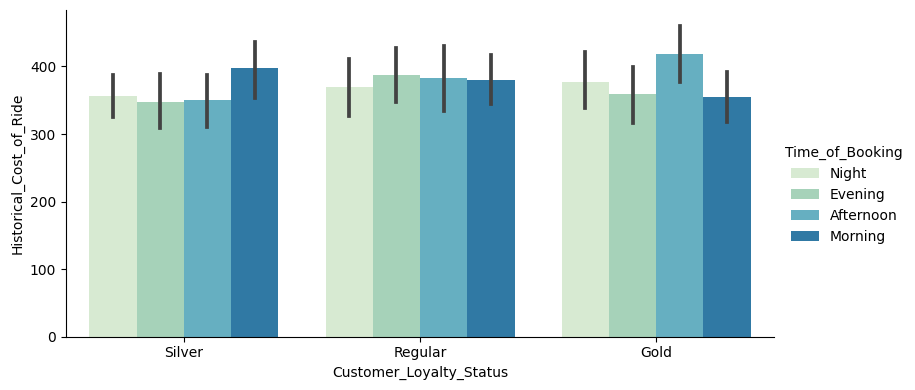

In [21]:
sns.catplot(data=data, x="Customer_Loyalty_Status", y="Historical_Cost_of_Ride", hue="Time_of_Booking", kind="bar", height=4, aspect=2, palette= 'GnBu')

In [22]:
fig = px.box(data, x='Average_Ratings',
             y='Historical_Cost_of_Ride'
             , template="none",  width=700, height=400)
fig.show()

In [23]:
fig = px.box(data, x='Customer_Loyalty_Status',
             y='Historical_Cost_of_Ride',
             title='Historical Cost of Ride Distribution by Time of Booking', template="none",  width=700, height=400)
fig.show()

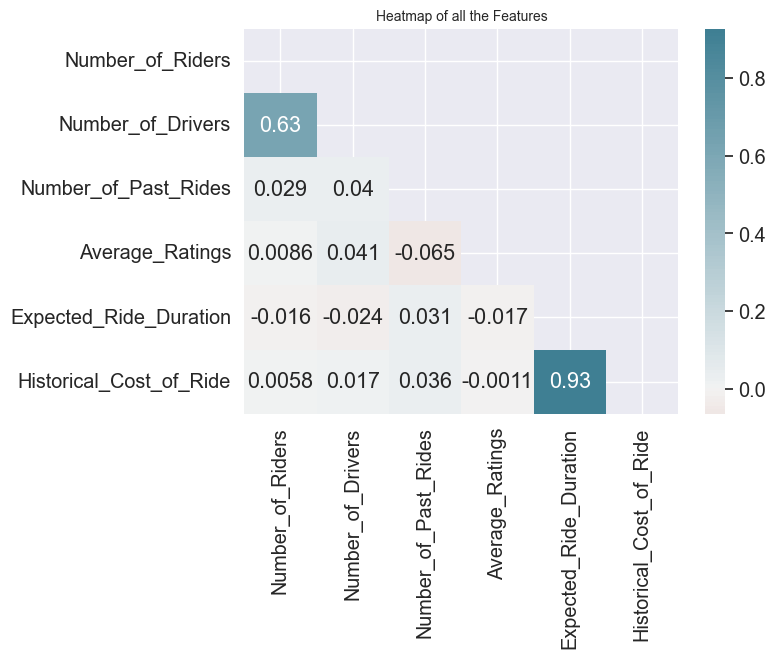

In [26]:
cats = [c for c in data.columns if data[c].dtypes =='object']
nums = [c for c in data.columns if c not in cats]

style.use('ggplot')
sns.set_style('whitegrid')
sns.set(font_scale=1.3)
plt.subplots(figsize = (7,5))
## Plotting heatmap. 

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(data[nums].corr(), dtype='bool')
mask[np.triu_indices_from(mask)] = True


sns.heatmap(data[nums].corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True, mask=mask, center = 0, );
## Give title. 
plt.title("Heatmap of all the Features", fontsize = 10);